In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [62]:
df = pd.read_csv('diamonds.csv')
df

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [63]:
df.shape

(53940, 11)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [65]:
df = df.drop(columns=['Unnamed: 0'])

In [66]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [67]:
df.duplicated().sum()

146

In [68]:
df = df.drop_duplicates()

In [69]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [70]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [71]:
df['Ideal'] = df['cut'].apply(lambda x: 1 if x=='Ideal' else 0)
df['Premium'] = df['cut'].apply(lambda x: 1 if x=='Premium' else 0)
df['Good'] = df['cut'].apply(lambda x: 1 if x=='Good' else 0)
df['Very Good'] = df['cut'].apply(lambda x: 1 if x=='Very Good' else 0)
df['Fair'] = df['cut'].apply(lambda x: 1 if x=='Fair' else 0)
df[['cut','Ideal','Premium','Good','Very Good','Fair']]

,cut,Ideal,Premium,Good,Very Good,Fair
0,Ideal,1,0,0,0,0
1,Premium,0,1,0,0,0
2,Good,0,0,1,0,0
3,Premium,0,1,0,0,0
4,Good,0,0,1,0,0
...,...,...,...,...,...,...
53935,Ideal,1,0,0,0,0
53936,Good,0,0,1,0,0
53937,Very Good,0,0,0,1,0
53938,Premium,0,1,0,0,0


In [72]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [73]:
df['Color_ASCII'] = df['color'].apply(lambda x: ord(x))
df[['color','Color_ASCII']]

,color,Color_ASCII
0,E,69
1,E,69
2,E,69
3,I,73
4,J,74
...,...,...
53935,D,68
53936,D,68
53937,D,68
53938,H,72


In [74]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [75]:
df['Internallt Flawless'] = df['clarity'].apply(lambda x: 1 if 'IF' in x else 0).astype('int64')
df['Included'] = df['clarity'].apply(lambda x: x[-1] if x=='I1' or x=='I2' in x else 0).astype('int64')
df['Slight Inclusions'] = df['clarity'].apply(lambda x: x[-1] if 'SI' in x else 0).astype('int64')
df['Very Very Slight Inclusions'] = df['clarity'].apply(lambda x: x[-1] if 'VVS' in x else 0).astype('int64')
df['Very Slight Inclusions'] = df['clarity'].apply(lambda x: x[-1] if x[:2]=='VS' else 0).astype('int64')
df[['clarity','Internallt Flawless','Included','Slight Inclusions','Very Very Slight Inclusions','Very Slight Inclusions']]

,clarity,Internallt Flawless,Included,Slight Inclusions,Very Very Slight Inclusions,Very Slight Inclusions
0,SI2,0,0,2,0,0
1,SI1,0,0,1,0,0
2,VS1,0,0,0,0,1
3,VS2,0,0,0,0,2
4,SI2,0,0,2,0,0
...,...,...,...,...,...,...
53935,SI1,0,0,1,0,0
53936,SI1,0,0,1,0,0
53937,SI1,0,0,1,0,0
53938,SI2,0,0,2,0,0


In [76]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z,...,Premium,Good,Very Good,Fair,Color_ASCII,Internallt Flawless,Included,Slight Inclusions,Very Very Slight Inclusions,Very Slight Inclusions
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,...,0,0,0,0,69,0,0,2,0,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,...,1,0,0,0,69,0,0,1,0,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,...,0,1,0,0,69,0,0,0,0,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,...,1,0,0,0,73,0,0,0,0,2
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,...,0,1,0,0,74,0,0,2,0,0


In [77]:
df = df.reset_index()
df.drop(columns=['index','cut','color','clarity'],inplace=True)

In [78]:
df

,carat,depth,table,price,x,y,z,Ideal,Premium,Good,Very Good,Fair,Color_ASCII,Internallt Flawless,Included,Slight Inclusions,Very Very Slight Inclusions,Very Slight Inclusions
0,0.23,61.5,55.0,326,3.95,3.98,2.43,1,0,0,0,0,69,0,0,2,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,0,0,69,0,0,1,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,0,1,0,0,69,0,0,0,0,1
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,1,0,0,0,73,0,0,0,0,2
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,1,0,0,74,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53789,0.72,60.8,57.0,2757,5.75,5.76,3.50,1,0,0,0,0,68,0,0,1,0,0
53790,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,0,1,0,0,68,0,0,1,0,0
53791,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,1,0,68,0,0,1,0,0
53792,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,1,0,0,0,72,0,0,2,0,0


### Linear Regration With Outliers

In [79]:
X = df[['carat','depth','table','x','y','z','Ideal','Premium','Good','Very Good','Fair','Color_ASCII','Internallt Flawless','Included','Slight Inclusions','Very Very Slight Inclusions','Very Slight Inclusions']]
Y = df[['price']]

In [80]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [81]:
lr = LinearRegression()

In [82]:
lr.fit(x_train,y_train)

LinearRegression()

In [83]:
y_pred = lr.predict(x_test)

In [84]:
r2_score(y_test,y_pred)

0.9166602166160598

### Remove OutLiers

In [85]:
df1 = df.copy()

In [86]:
def check_outliers(column):
    q1 = df1[column].quantile(0.25)
    q3 = df1[column].quantile(0.75)
    iqr = q3-q1
    lower = q1 - (iqr * 1.5)
    upper = q3 + (iqr * 1.5)
    return lower,upper

In [87]:
df1['carat'].describe()

count    53794.00000
mean         0.79778
std          0.47339
min          0.20000
25%          0.40000
50%          0.70000
75%          1.04000
max          5.01000
Name: carat, dtype: float64

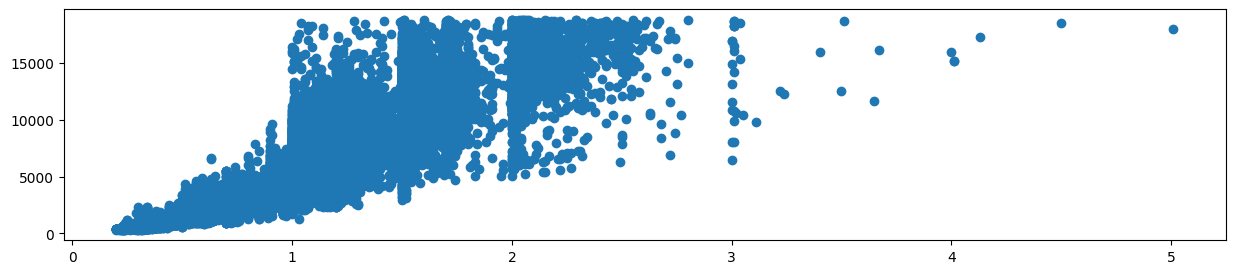

In [88]:
plt.figure(figsize=(15,3))
plt.scatter(df1['carat'],df1['price'])

In [89]:
lower_carat , upper_carat = check_outliers('carat')
df1.loc[df1['carat'] >= upper_carat, 'carat'] = upper_carat
df1.loc[df1['carat'] <= lower_carat, 'carat'] = lower_carat

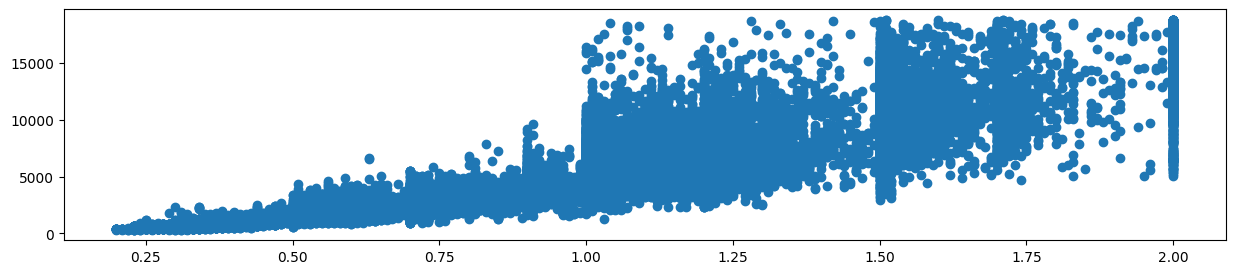

In [90]:
plt.figure(figsize=(15,3))
plt.scatter(df1['carat'],df1['price'])

In [91]:
df1['depth'].describe()

count    53794.000000
mean        61.748080
std          1.429909
min         43.000000
25%         61.000000
50%         61.800000
75%         62.500000
max         79.000000
Name: depth, dtype: float64

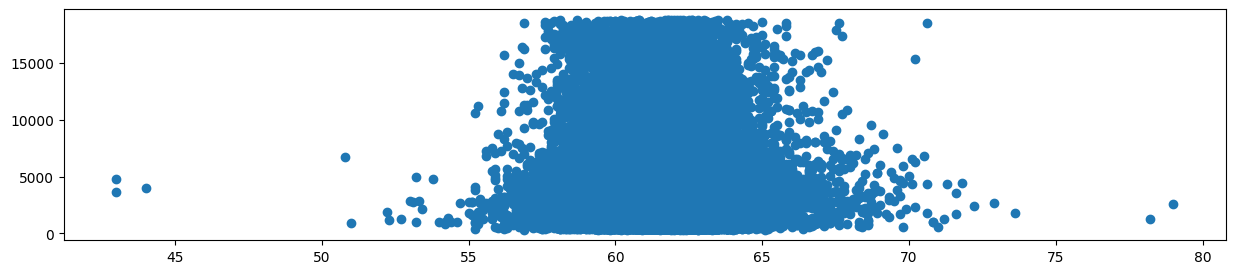

In [92]:
plt.figure(figsize=(15,3))
plt.scatter(df1['depth'],df1['price'])

In [93]:
lower_depth , upper_depth = check_outliers('depth')
df1.loc[df1['depth'] >= upper_depth, 'depth'] = upper_depth
df1.loc[df1['depth'] <= lower_depth, 'depth'] = lower_depth

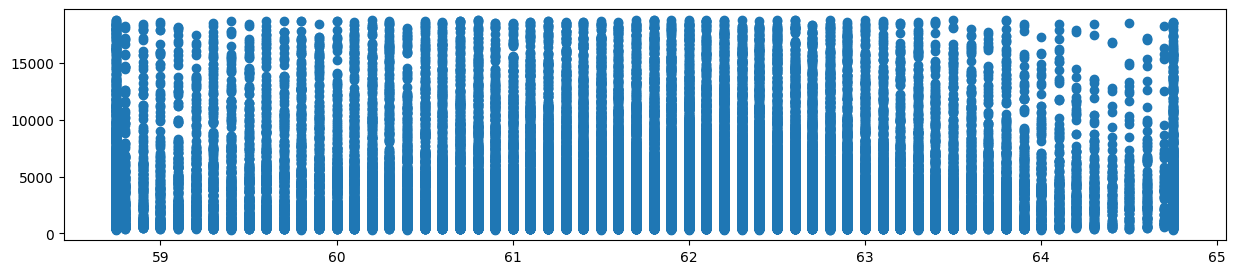

In [94]:
plt.figure(figsize=(15,3))
plt.scatter(df1['depth'],df1['price'])

In [95]:
df1['table'].describe()

count    53794.000000
mean        57.458109
std          2.233679
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

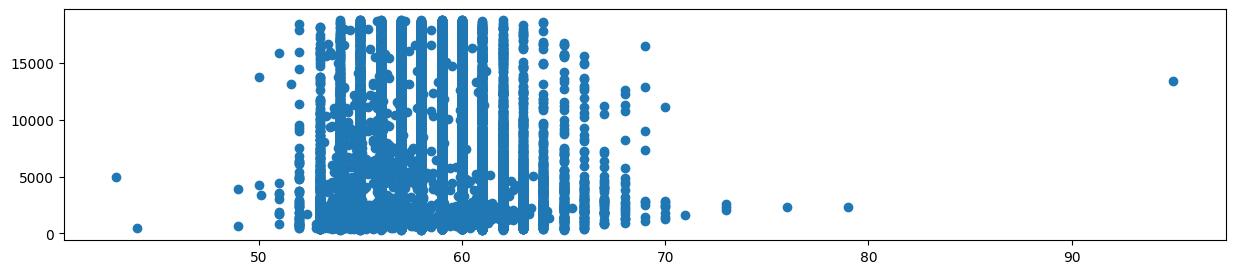

In [96]:
plt.figure(figsize=(15,3))
plt.scatter(df1['table'],df1['price'])

In [97]:
lower_table , upper_table = check_outliers('table')
df1.loc[df1['table'] >= upper_table, 'table'] = upper_table
df1.loc[df1['table'] <= lower_table, 'table'] = lower_table

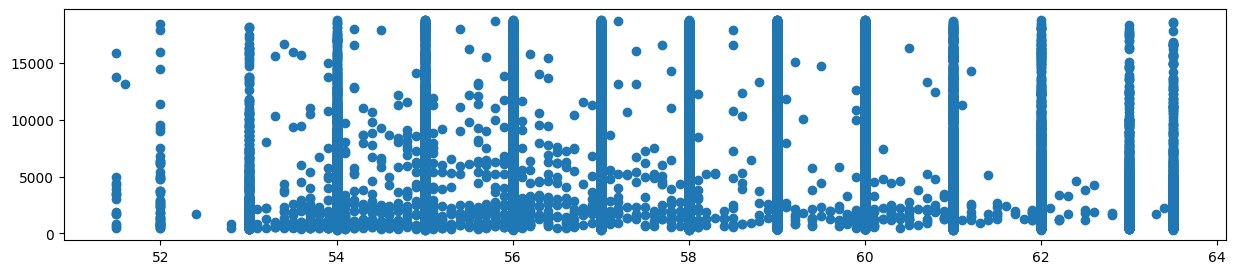

In [98]:
plt.figure(figsize=(15,3))
plt.scatter(df1['table'],df1['price'])

In [99]:
df1['x'].describe()

count    53794.000000
mean         5.731214
std          1.120695
min          0.000000
25%          4.710000
50%          5.700000
75%          6.540000
max         10.740000
Name: x, dtype: float64

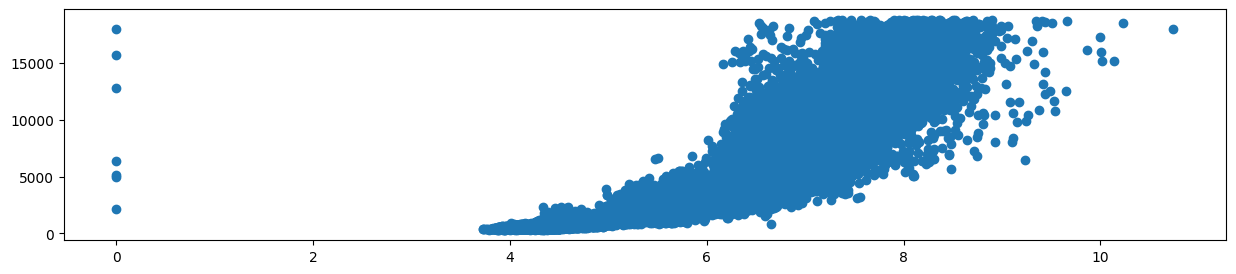

In [100]:
plt.figure(figsize=(15,3))
plt.scatter(df1['x'],df1['price'])

In [101]:
lower_x , upper_x = check_outliers('x')
df1.loc[df1['x'] >= upper_x, 'x'] = upper_x
df1.loc[df1['x'] <= lower_x, 'x'] = lower_x

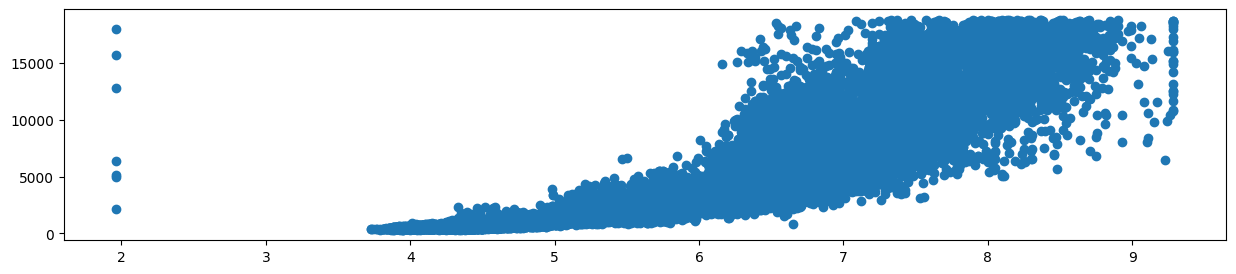

In [102]:
plt.figure(figsize=(15,3))
plt.scatter(df1['x'],df1['price'])

In [103]:
df1['y'].describe()

count    53794.000000
mean         5.734653
std          1.141209
min          0.000000
25%          4.720000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

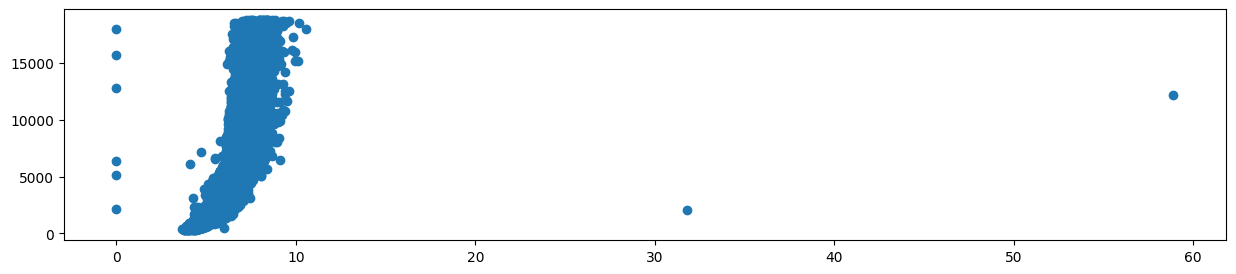

In [104]:
plt.figure(figsize=(15,3))
plt.scatter(df1['y'],df1['price'])

In [105]:
lower_y , upper_y = check_outliers('y')
df1.loc[df1['y'] >= upper_y, 'y'] = upper_y
df1.loc[df1['y'] <= lower_y, 'y'] = lower_y

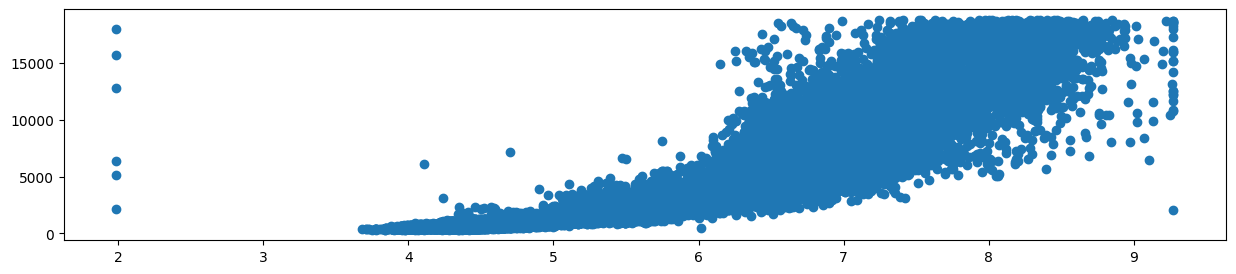

In [106]:
plt.figure(figsize=(15,3))
plt.scatter(df1['y'],df1['price'])

In [107]:
df1['z'].describe()

count    53794.000000
mean         3.538714
std          0.705037
min          0.000000
25%          2.910000
50%          3.530000
75%          4.030000
max         31.800000
Name: z, dtype: float64

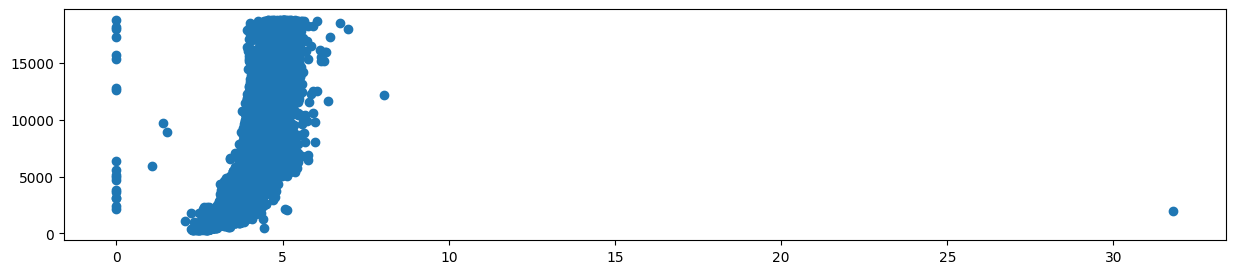

In [108]:
plt.figure(figsize=(15,3))
plt.scatter(df1['z'],df1['price'])

In [109]:
lower_z , upper_z = check_outliers('z')
df1.loc[df1['z'] >= upper_z, 'z'] = upper_z
df1.loc[df1['z'] <= lower_z, 'z'] = lower_z

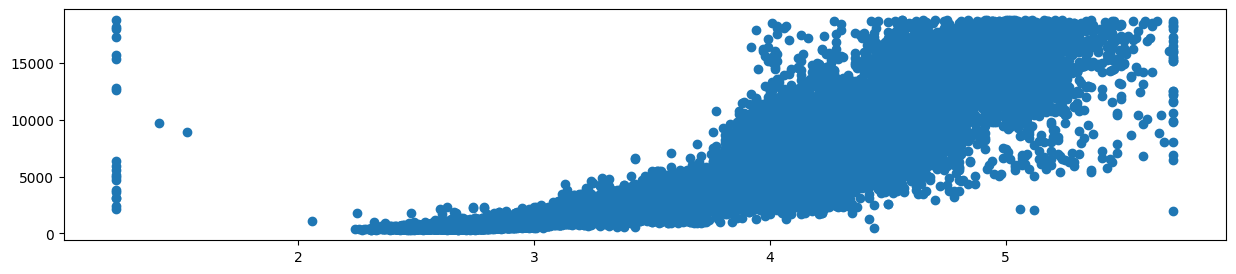

In [110]:
plt.figure(figsize=(15,3))
plt.scatter(df1['z'],df1['price'])

### Linear Regration Without Outliears

In [111]:
X1= df[['carat','depth','table','x','y','z','Ideal','Premium','Good','Very Good','Fair','Color_ASCII','Internallt Flawless','Included','Slight Inclusions','Very Very Slight Inclusions','Very Slight Inclusions']]
Y1 = df[['price']]

In [112]:
x1_train,x1_test,y1_train,y1_test = train_test_split(X1,Y1,test_size=0.20,random_state=50)

In [113]:
lr1 = LinearRegression()

In [114]:
lr1.fit(x1_train,y1_train)

LinearRegression()

In [115]:
y1_pred = lr1.predict(x1_test)

In [116]:
r2_score(y1_test,y1_pred)

0.9181247055876346

In [117]:
mean_squared_error(y1_test,y1_pred)

1314655.4082953602

In [118]:
mean_absolute_error(y1_test,y1_pred)

760.3198933096786